# Datan analysointi K2021 - Tehtävät kerta 7

**Opiskelijan nimi:**

Harjoituskerran 7 tehtävistä palautetaan Moodleen tiedosto muodossa **harjoitus7_etunimi_sukunimi.ipynb**. Jokaiseen vastattuun tehtävään tulee ajaa niiden ratkaisut näkyville. Vain ajetut ratkaisut voidaan arvioida. Tehtäväsi arvioidaan pistein:

* 1,0 p. Vastaus on täysin oikein.
* 0,5 p. Vastaus on osittain oikein.
* 0 p. Vastaus on väärin.

**Tehtävissä ei tule käyttää silmukkarakenteita.** Sen sijaan tämän harjoituksen tehtävät kirjoitetaan ilman funktiorakennetta (skripti muodossa).


## 1. Lineaarinen regressio

Eräs kappale on tasaisesti kiihtyvässä liikkeessä ja siitä on mitattu aika liikkeelle lähdöstä sekunteina, paikka yksiköissä $m$, nopeus yksiköissä $m/s$ ja kiihtyvyys yksiköissä $m/s^2$. Tee alla olevan esimerkkikuvan kaltainen kuva, jossa
* olet käsitellyt datan lukemalla sen DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv),
* jos datassa on NaN arvoja olet sijoittanut niiden paikalle arvon 0,
* vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty nopeus 'Velocity v / m/s',
* mitatut arvot ('Time t / s','Velocity v / m/s') näkyvät sinisellä värillä 'x' merkillä,
* mitattuihin arvoihin on sovitettu pienimmän neliösumman menetelmällä suora,
* suoran yhtälö (Fitted) ja mitatut arvot (Measured) on esitetty kuvan selitteessä ja suoran yhtälön kertoimet on esitetty neljän desimaalin tarkkuudella,
* mitattujen aika 'Time t / s' ja nopeus 'Velocity v / m/s' arvoista on laskettu korrelaatiokerroin ja kovarianssi,
* kovarianssi (Covariance) ja korrelaatiokerroin (Correlation) on pyöristetty kolmen desimaalin tarkkuuteen ja esitetty kuvassa kuvaan lisätyn tekstin avulla.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/tehtava1.svg" width="450"/>

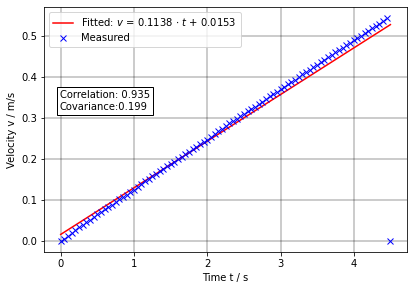

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv'
df = pd.read_csv(url, sep=';', decimal=',')
df = df.fillna(0)

# mitattuihin arvoihin on sovitettu pienimmän neliösumman menetelmällä suora,
x = df['Time t / s'].to_frame()
y = df['Velocity v / m/s']
malli = LinearRegression().fit(x, y)
y_pred = malli.predict(x)
# suoran yhtälö (Fitted) ja mitatut arvot (Measured) on esitetty kuvan selitteessä ja suoran yhtälön kertoimet on esitetty 
# neljän desimaalin tarkkuudella
coef = (malli.coef_[0]).round(4)
intercept = (malli.intercept_).round(4)
plt.figure(figsize=(6.5, 4.5))
plt.grid(color = 'black', linestyle = '-', linewidth = 0.4)
plt.plot(x, y_pred, color='r',  label="Fitted: $\it{v}$ = " + str(coef) + " $\cdot$ $\it{t}$ + " + str(intercept))
# vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty nopeus 'Velocity v / m/s'
# mitatut arvot ('Time t / s','Velocity v / m/s') näkyvät sinisellä värillä 'x' merkillä
plt.plot(df['Time t / s'], df['Velocity v / m/s'], 'bx', label='Measured')
plt.xlabel('Time t / s')
plt.ylabel('Velocity v / m/s')
# kovarianssi (Covariance) ja korrelaatiokerroin (Correlation) on pyöristetty kolmen desimaalin tarkkuuteen ja esitetty kuvassa 
# kuvaan lisätyn tekstin avulla
correlation = df["Time t / s"].corr(df["Velocity v / m/s"]).round(3)
covariance = df["Time t / s"].cov(df["Velocity v / m/s"]).round(3)
corr_cov_text = f"Correlation: {correlation}\nCovariance:{covariance}"
plt.annotate(corr_cov_text, xy=(-.01, .32), bbox=dict(boxstyle="square", fc="white"))
plt.legend(loc='upper left')

plt.show()


## 2. Muuttujien muunnokset ja lineaarinen regressio

Eräs kappale on tasaisesti kiihtyvässä liikkeessä ja siitä on mitattu aika liikkeelle lähdöstä sekunteina, paikka yksiköissä $m$, nopeus yksiköissä $m/s$ ja kiihtyvyys yksiköissä $m/s^2$. Tee alla olevan esimerkkikuvan kaltainen kuva, jossa
* olet käsitellyt datan lukemalla sen DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv),
* jos datassa on NaN arvoja olet sijoittanut niiden paikalle arvon 0,
* vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty kappaleen paikka 'Path s_A1 / m',
* mitatut arvot ('Time t / s','Path s_A1 / m') näkyvät sinisellä värillä 'x' merkillä,
* mitattuihin arvoihin on sovitettu muuttujien muunnoksen ja lineaarisen regression avulla toisen asteen yhtälö,
* toisen asteen yhtälö (Fitted) ja mitatut arvot (Measured) on esitetty kuvan selitteessä ja toisen asteen yhtälön kertoimet on esitetty neljän desimaalin tarkkuudella.

Muuttujien muunnoksessa voit tehdä muunnoksen 
$$d=\sqrt{s},$$
missä $s$ on kappaleen paikka metreinä ja $d$ on uusi muuttuja, jonka avulla voidaan lineaarisen regression avulla laskea toisen asteen yhtälön termit.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/tehtava2.svg" width="450"/>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv'
df = pd.read_csv(url, sep=';')
df = df.fillna(0)


## 3. Muuttujien väliset riippuvuudet

Tehtävissä 3., 4. ja 5. käsitellään [pankkilainadataa](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv), joka sisältää seuraavat sarakkeet:

| Column name        | Description                                                                 |
| :--- | :--- |
| ID                 | Customer ID                                                                 |
| Age                | Customer's age in completed years                                           |
| Experience         | #years of professional experience                                           |
| Income             | Annual income of the customer (\$000)                                        |
| ZIPCode            | Home Address ZIP code.                                                      |
| Family             | Family size of the customer                                                 |
| CCAvg              | Avg. spending on credit cards per month (\$000)                              |
| Education          | Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional        |
| Mortgage           | Value of house mortgage if any. (\$000)                                      |
| Personal Loan      | Did this customer accept the personal loan offered in the last campaign?    |
| Securities Account | Does the customer have a securities account with the bank?                  |
| CD Account         | Does the customer have a certificate of deposit (CD) account with the bank? |
| Online             | Does the customer use internet banking facilities?                          |
| CreditCard         | Does the customer use a credit card issued by UniversalBank?                |

Edellä kuvatussa datassa esiintyy sarake **'Personal Loan'**, jossa asiakkaan lainatarjouksen hyväksymispäätöstä on merkitty arvolla 1 ja kieltäytymispäätöstä on merkitty arvolla 0.

Selvitä [datasta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) seuraavat asiat:
* Kuinka paljon datassa on lainatarjouksen hyväksymis- ja kieltäytymispäätöksiä?
* Millä viidellä muuttujalla on suurin lineaarinen riippuvuus muuttujaan 'Personal Loan' verrattuna?
* Luettele kolme muuttujaparia, joilla on keskinäinen lineaarinen riippuvuus on suurinta.
* Esitä data valitsemallasi visualisointimenetelmällä, joka mielestäsi kuvaa parhaiten muuttujien välisiä lineaarisia riippuvuussuhteita.


Voit antaa vastauksesi hyvin dokumentoidun koodin muodossa.

In [17]:
import pandas as pd

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv'
df = pd.read_csv(url, sep=';')
# Kuinka paljon datassa on lainatarjouksen hyväksymis- ja kieltäytymispäätöksiä?
print(df['Personal Loan'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64


In [41]:
# Millä viidellä muuttujalla on suurin lineaarinen riippuvuus muuttujaan 'Personal Loan' verrattuna?
import pandas as pd

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv'
df = pd.read_csv(url, sep=';')
print(df.corrwith(df["Personal Loan"]).abs().sort_values(ascending=False)[1:6])

Income        0.502462
CD Account    0.316355
Mortgage      0.142095
Education     0.136722
Family        0.061367
dtype: float64


In [20]:
import pandas as pd

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv'
df = pd.read_csv(url, sep=';')
# Luettele kolme muuttujaparia, joilla keskinäinen lineaarinen riippuvuus on suurinta
tulos = df.corr().unstack().sort_values(ascending=False).drop_duplicates()
print(tulos[1:4])

Age            Experience            0.994215
Personal Loan  Income                0.502462
CD Account     Securities Account    0.317034
dtype: float64


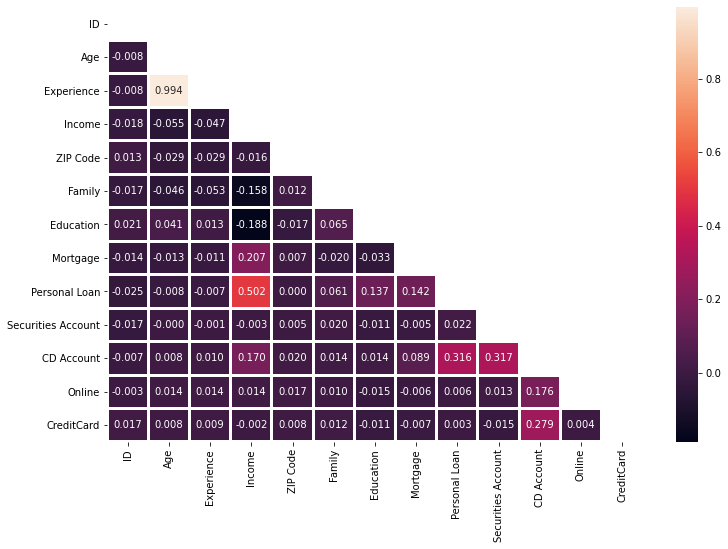

Tulos: Experience-Age: 0.994, Personal Loan-Income: 0.502 ja CD Account-Securities Account: 0.317


In [30]:
import pandas as pd
import seaborn as sns
import numpy as np

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv'
df = pd.read_csv(url, sep=';')
# Esitä data valitsemallasi visualisointimenetelmällä, joka mielestäsi kuvaa parhaiten muuttujien välisiä lineaarisia 
# riippuvuussuhteita
plt.figure(figsize=(12, 8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidth=2, mask=matrix)
plt.show()
print('Tulos: Experience-Age: 0.994, Personal Loan-Income: 0.502 ja CD Account-Securities Account: 0.317')


## 4. Logistinen regressio

Selvitä [datasta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) kaksi muuttujaa joilla on suurimmat lineaariset riippuvuudet muuttujan 'Personal Loan' välillä. Tee kuva, jossa olet esittänyt kahden em. muuttujan välistä riippuvuutta muuttujan 'Personal loan' välillä hajontakuviolla. Tee sitten vielä logistisen regression avulla malli, jossa selittävinä muuttujina ovat vuositulot ('Income') ja luottokorttikulutus ('CCAvg') sekä selitettävänä muuttujana lainapäätös ('Personal Loan'). Mitä voit sanoa logistisen regressiomallin avulla henkilön lainatarjouksen hyväksymisestä seuraavissa tilanteissa:
* Henkilön vuositulot ovat 50 000 \\$ ja luottokorttikulutus on 1000 \\$/kk.
* Henkilön vuositulot ovat 150 000 \\$ ja luottokorttikulutus on 4000 \\$/kk.

Voit antaa vastauksesi hyvin dokumentoidun koodin muodossa.

Income        0.502462
CD Account    0.316355
dtype: float64


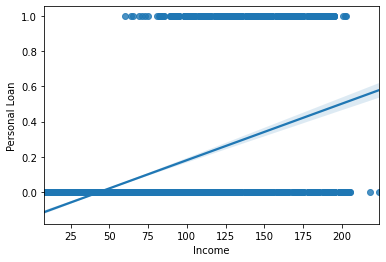

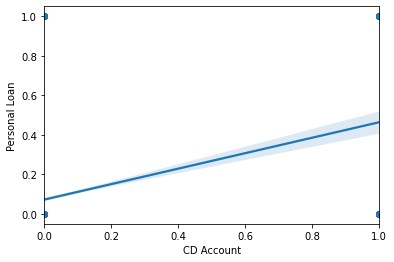

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv'
df = pd.read_csv(url, sep=';')
# Selvitä datasta kaksi muuttujaa joilla on suurimmat lineaariset riippuvuudet muuttujan 'Personal Loan' välillä.
print(df.corrwith(df["Personal Loan"]).abs().sort_values(ascending=False)[1:3])
# Tee kuva, jossa olet esittänyt kahden em. muuttujan välistä riippuvuutta muuttujan 'Personal loan' välillä hajontakuviolla. 
sns.regplot(x="Income", y="Personal Loan", data=df)
plt.show()
sns.regplot(x="CD Account", y="Personal Loan", data=df)
#sns.pairplot(df[['Income', 'CD Account', 'Personal Loan']].dropna(), kind='reg')
plt.show()

LogisticRegression()
ennusteet kaikille riveille: [0 0 0 ... 0 0 0]
ensin nollan todennäköisyys, sitten ykkösen:
 [[0.98631481 0.01368519]
 [0.99194886 0.00805114]
 [0.99652433 0.00347567]
 ...
 [0.99475255 0.00524745]
 [0.98724421 0.01275579]
 [0.95806529 0.04193471]]
kuinka iso osa ennusteista menee oikein: 0.9072
ennusteet kaikille lähtöarvoille:
 [[4380  140]
 [ 324  156]]
kulmakertoimet: [[1.62549484 0.11322187]]
vakiotermi: [-3.38087797]


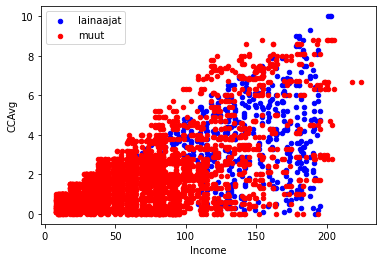

väärin menneet ennusteet:


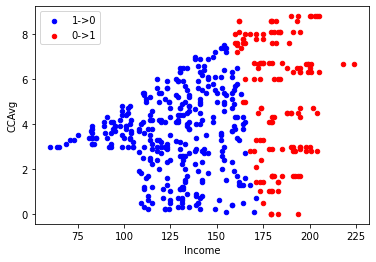

Kun henkilön vuositulot ovat 50 000 $ ja luottokorttikulutus on 1000 $/kk, hän ei todennäköisesti hyväksy lainatarjousta.
Kun henkilön vuositulot ovat 150 000 $ ja luottokorttikulutus on 4000 $/kk, hän todennäköisesti hyväksyy lainatarjouksen.


In [43]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv'
df = pd.read_csv(url, sep=';', decimal=',')
# Tee logistisen regression avulla malli, jossa selittävinä muuttujina ovat vuositulot ('Income') ja luottokorttikulutus 
# ('CCAvg') sekä selitettävänä muuttujana lainapäätös ('Personal Loan')
x = df[['Income', 'CCAvg']]
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df['Personal Loan']
malli = LogisticRegression()
malli.fit(x,y)
print(malli)
print('ennusteet kaikille riveille:', malli.predict(x)) 
print('ensin nollan todennäköisyys, sitten ykkösen:\n', malli.predict_proba(x)) 
print('kuinka iso osa ennusteista menee oikein:', malli.score(x, y)) 
y_pred = malli.predict(x)
print('ennusteet kaikille lähtöarvoille:\n', confusion_matrix(y, y_pred))
print('kulmakertoimet:', malli.coef_)
print('vakiotermi:', malli.intercept_)

tod_lainaajat = df[df['Personal Loan']==1]
tod_muut = df[df['Personal Loan']==0]
ax1 = tod_lainaajat.plot.scatter('Income', 'CCAvg', color='b', label='lainaajat')
tod_muut.plot.scatter('Income', 'CCAvg', ax=ax1, color='r', label='muut')
plt.show()

print('väärin menneet ennusteet:')
ykk_nollina = df[(y==1) & (y_pred==0)]
noll_ykk = df[(y==0) & (y_pred==1)]
ax1 = ykk_nollina.plot.scatter('Income', 'CCAvg', color='b', label='1->0')
noll_ykk .plot.scatter('Income', 'CCAvg', ax=ax1, color='r', label='0->1')
plt.show()

# Mitä voit sanoa logistisen regressiomallin avulla henkilön lainatarjouksen hyväksymisestä seuraavissa tilanteissa:
print('Kun henkilön vuositulot ovat 50 000 $ ja luottokorttikulutus on 1000 $/kk, hän ei todennäköisesti hyväksy lainatarjousta.')
print('Kun henkilön vuositulot ovat 150 000 $ ja luottokorttikulutus on 4000 $/kk, hän todennäköisesti hyväksyy lainatarjouksen.')

## 5. Lainapäätös

Tee annetun [datan](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) avulla päätöspuu, joka yrittää selittää asiakkaan päätöstä lainatarjouksesta ('Personal loan'). Asiakkaan lainatarjouksen hyväksymispäätöstä on merkitty arvolla 1 ja kieltäytymispäätöstä on merkitty arvolla 0. Aseta päätöspuun muodostamisessa (DecisionTreeClassifier) puun syvyydeksi (max_depth) arvo 4 ja datasettien (luennoilla: lokerot) jakokriteeriksi **ASM** heuristiikalla suurin informaatiosaanto.

Visualisoi päätöspuu export_graphviz funktion ja [Graphviz työkalua](http://dreampuf.github.io/GraphvizOnline/) hyödyntäen. Ilmoita vastauksessasi koodi, jolla olet tuottanut tehnyt em. päätöspuun ja tuottanut siitä export_graphviz funktiolla .dot muotoisen tiedoston visualisointia varten. 

Liitä myös vastauksesi kommentteihin mitä voit sanoa seuraavien henkilöiden päätöksestä hyväksyä lainatarjous:
* Henkilön vuosittaiset tulot ('Income') ovat 50 000 \\$ ja keskimääräinen luottokorttikulutus kuukaudessa ('CCAvg') on 1 000 \\$.
* Henkilön vuosittaiset tulot ovat 150 000 \$, koulutustaso ('Education') vastaa korkeakoulutasoa ('Advanced/Professional').
* Henkilön vuosittaiset tulot ovat 100 000 \$, koulutustaso ('Education') vastaa peruskoulutustasoa ('Undergrad') ja henkilön perheessä ('Family') on kolme henkilöä.

**Lisätietoa:** Päätöspuun muodostamisessa koko datasettiä jaetaan Attribute Selection Measure (**ASM**) heuristiikan avulla pienempiin datasetteihin, jotka yrittävät selittää selitettävää muuttujaa (**Personal loan**). Selvitä päätöspuun [dokumentaatiota](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) tutkimalla kuinka datasettejä voidaan jakaa osiin, jos tavoitteena on saavuttaa suurin informaatiosaanto (**information gain**).



In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv'
df = pd.read_csv(url, sep=';', decimal=',')
x = df[['Income', 'CCAvg', 'Education', 'Family']]
y = df['Personal Loan']
# luodaan malli-olio
malli = DecisionTreeClassifier(criterion='entropy', max_depth=4)
# sovitetaan, eli generoidaan päätöspuu
malli.fit(x,y)
# ennustetaan tulokset
y_pred = malli.predict(x)
# katsotaan tarkkuus
print("Accuracy:",malli.score(x,y))
export_graphviz(decision_tree=malli, out_file="tree.dot",
                feature_names=x.columns, class_names=True, filled=True, rounded=True)
print('Kun henkilön vuosittaiset tulot (\'Income\') ovat 50 000 $ ja keskimääräinen luottokorttikulutus kuukaudessa (\'CCAvg\') on 1 000 $, niin hän ei hyväksy lainatarjousta.')
print('Kun henkilön vuosittaiset tulot ovat 150 000 $, koulutustaso (\'Education\') vastaa korkeakoulutasoa (\'Advanced/Professional\'), niin hän hyväksyy lainatarjouksen.')
print('Kun henkilön vuosittaiset tulot ovat 100 000 $, koulutustaso (\'Education\') vastaa peruskoulutustasoa (\'Undergrad\') ja henkilön perheessä (\'Family\') on kolme henkilöä, niin hän ei hyväksy lainatarjousta.')

Accuracy: 0.9844
Kun henkilön vuosittaiset tulot ('Income') ovat 50 000 $ ja keskimääräinen luottokorttikulutus kuukaudessa ('CCAvg') on 1 000 $, niin hän ei hyväksy lainatarjousta.
Kun henkilön vuosittaiset tulot ovat 150 000 $, koulutustaso ('Education') vastaa korkeakoulutasoa ('Advanced/Professional'), niin hän hyväksyy lainatarjouksen.
Kun henkilön vuosittaiset tulot ovat 100 000 $, koulutustaso ('Education') vastaa peruskoulutustasoa ('Undergrad') ja henkilön perheessä ('Family') on kolme henkilöä, niin hän ei hyväksy lainatarjousta.
